# Chapter 3: Data Visualization


> (c) 2019-2020 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.
>
> Date: 2020-03-08
>
> Python Version: 3.8.2
> Jupyter Notebook Version: 5.6.1
>
> Packages:
>   - matplotlib: 3.2.0
>   - pandas: 1.0.1
>
> The assistance from Mr. Kuber Deokar and Ms. Anuja Kulkarni in preparing these solutions is gratefully acknowledged.


In [1]:
# import required packages for this chapter
from pathlib import Path

import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('.').resolve().parent / 'data'
FIGURES = Path('.').resolve().parent / 'figures' / 'chapter_03'
FIGURES.mkdir(exist_ok=True, parents=True)
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

# Problem 3.1 Shipments of Household Appliances: Line Graphs.

The file _ApplianceShipments.csv_ contains the series of quarterly shipments (in millions of dollars) of US household appliances between 1985 and 1989.

__3.1.a.__ Create a well-formatted time plot of the data using Python.

In [13]:
# load the data

shipments_df = pd.read_csv('ApplianceShipments.csv', squeeze=True)
shipments_df.shape

(20, 2)

In [14]:
shipments_df.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


In [15]:
# convert the data frame to be suitable for time series analysis
# create date range for quarters
#shipments_df = shipments_df.iloc[0:,1:2]
#shipments_df.head()
date_range = pd.date_range(start='1/1/1985', end='12/31/1989', freq='Q')
shipments_df['Date'] = pd.to_datetime(date_range)
shipments_ts = pd.Series(shipments_df.Shipments.values, index=shipments_df.Date)
shipments_ts

Date
1985-03-31    4009
1985-06-30    4321
1985-09-30    4224
1985-12-31    3944
1986-03-31    4123
1986-06-30    4522
1986-09-30    4657
1986-12-31    4030
1987-03-31    4493
1987-06-30    4806
1987-09-30    4551
1987-12-31    4485
1988-03-31    4595
1988-06-30    4799
1988-09-30    4417
1988-12-31    4258
1989-03-31    4245
1989-06-30    4900
1989-09-30    4585
1989-12-31    4533
dtype: int64

Text(0, 0.5, 'Shipments (in millon dollars)')

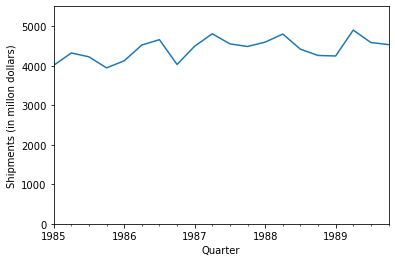

In [16]:
# line plot
shipments_ts.plot( ylim=(0, 5500),legend=False)
plt.xlabel('Quarter')
plt.ylabel('Shipments (in millon dollars)')

__3.1.b.__ Does there appear to be a quarterly pattern? For a closer view of the patterns, zoom in to the range of 3500–5000 on the y-axis.

Text(0, 0.5, 'Shipments (in millon dollars)')

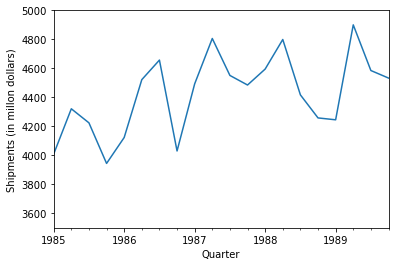

In [17]:
shipments_ts.plot(ylim=(3500, 5000), legend=False)
plt.xlabel('Quarter')
plt.ylabel('Shipments (in millon dollars)')

Yes, there appears a quarterly pattern in the above time series. The time plot shows a repeating pattern each year (more shipments in Q2 and Q3 and less shipments in Q1 and Q4). Limiting the y-axis to the range of 3500 - 5000 shows the quarterly pattern in the time series a bit more clearly.

__3.1.c.__ Using Python, create one chart with four separate lines, one line for each of Q1, Q2, Q3, and Q4. In Python, this can be achieved by adding columns for quarter and year. Then group the data frame by quarter and then plot shipment versus year for each quarter as a separate series on a line graph. Zoom in to the range of 3500–5000 on the y-axis. Does there appear to be a difference between quarters?

In [18]:
# generate separate time series for each quarter
Q1 = shipments_df.iloc[[0, 4, 8, 12, 16], :]
Q1_ts = pd.Series(Q1.Shipments.values, index=Q1.Date)
Q2 = shipments_df.iloc[[1, 5, 9, 13, 17], :]
Q2_ts = pd.Series(Q2.Shipments.values, index=Q2.Date)
Q3 = shipments_df.iloc[[2, 6, 10, 14, 18], :]
Q3_ts = pd.Series(Q3.Shipments.values, index=Q3.Date)
Q4 = shipments_df.iloc[[3, 7, 11, 15, 19], :]
Q4_ts = pd.Series(Q4.Shipments.values, index=Q4.Date)

Text(0, 0.5, 'Shipments (in millon dollars)')

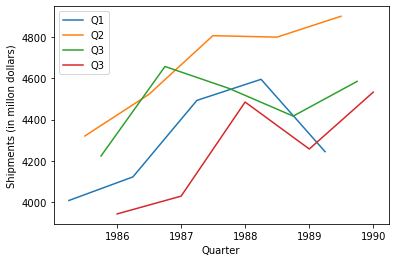

In [19]:
# line plots
plt.plot(Q1_ts, data=Q1_ts, label='Q1')
plt.legend()
plt.plot(Q2_ts, data=Q2_ts, label='Q2')
plt.legend()
plt.plot(Q3_ts, data=Q3_ts, label='Q3')
plt.legend()
plt.plot(Q4_ts, data=Q4_ts, label='Q3')
plt.legend()
plt.xlabel('Quarter')
plt.ylabel('Shipments (in millon dollars)')

Yes, we can see differences between the quarters. From the above plot we can see that the shipments in quarters Q2 and Q3 are larger than in quarters Q1 and Q4.

__3.1.d.__ Using Python, create a line graph of the series at a yearly aggregated level (i.e., the total shipments in each year).

Text(0, 0.5, 'Shipments (in millon dollars)')

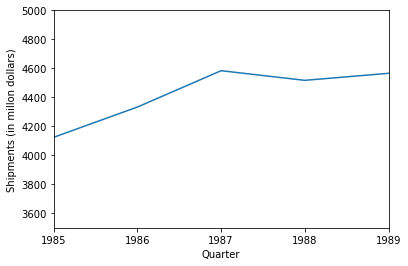

In [20]:
# yearly aggregated series
byYear = shipments_ts.groupby(pd.Grouper(freq='A')).mean()
byYear.plot(ylim=(3500, 5000), legend=False)
plt.xlabel('Quarter')
plt.ylabel('Shipments (in millon dollars)')


Shipments show increasing trend from 1985-1987. After that it is mostly flat.

# 3.2. Sales of Riding Mowers: Scatter Plots. 

A company that manufactures riding mowers wants to identify the best sales prospects for an intensive sales campaign. In
particular, the manufacturer is interested in classifying households as prospective owners or nonowners on the basis of Income (in $ 1000s) and Lot Size (in 1000 ft2). The marketing expert looked at a random sample of 24 households, given in the file _RidingMowers.csv_.

__3.2.a.__ Using Python, create a scatter plot of Lot Size vs. Income, color-coded by the outcome variable owner/nonowner. Make sure to obtain a well-formatted plot (create legible labels and a legend, etc.).

In [22]:
# load the data
mowers_df = pd.read_csv('RidingMowers.csv', squeeze=True)
mowers_df.shape

(24, 3)

In [12]:
mowers_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [ ]:
mowers_df.plot.scatter?

In [42]:
mowers_df.plot.scatter()
# place the cursor in the parentheses and use shift+tab to call help

<AxesSubplot:xlabel='Income', ylabel='Lot_Size'>

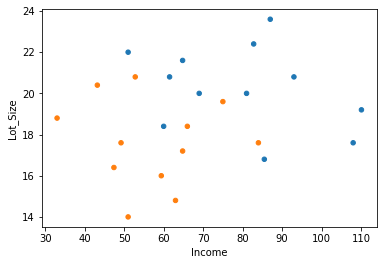

In [39]:
# scatter plot of Lot Size vs. Income

mowers_df.plot.scatter(x='Income', y='Lot_Size',
c=['C0' if s == 'Owner' else 'C1' for s in mowers_df.Ownership])

Owners appears to have higher income and larger lot sizes as compared to non-owners.

# 3.3. Laptop Sales at a London Computer Chain: Bar Charts and Boxplots. 

The file _LaptopSalesJanuary2008.csv_ contains data for all sales of laptops at a computer chain in London in January 2008. This is a subset of the full dataset that includes data for the entire year.

In [14]:
# load the data
laptop_df = pd.read_csv('LaptopSalesJanuary2008.csv', squeeze=True)
# Check if data is loaded correctly
print(mowers_df.shape)
print(laptop_df.head())

(24, 3)
            Date  Configuration Customer Postcode Store Postcode  \
0  1/1/2008 0:01            163          EC4V 5BH        SE1 2BN   
1  1/1/2008 0:02            320           SW4 0JL       SW12 9HD   
2  1/1/2008 0:04             23          EC3V 1LR         E2 0RY   
3  1/1/2008 0:04            169          SW1P 3AU        SE1 2BN   
4  1/1/2008 0:06            365          EC4V 4EG       SW1V 4QQ   

   Retail Price  Screen Size (Inches)  Battery Life (Hours)  RAM (GB)  \
0           455                    15                     5         1   
1           545                    15                     6         1   
2           515                    15                     4         1   
3           395                    15                     5         1   
4           585                    15                     6         2   

   Processor Speeds (GHz) Integrated Wireless?  HD Size (GB)  \
0                     2.0                  Yes            80   
1               

In [15]:
# Print the list of variables to the screen
laptop_df.columns

Index(['Date', 'Configuration', 'Customer Postcode', 'Store Postcode',
       'Retail Price', 'Screen Size (Inches)', 'Battery Life (Hours)',
       'RAM (GB)', 'Processor Speeds (GHz)', 'Integrated Wireless?',
       'HD Size (GB)', 'Bundled Applications?', 'OS X Customer',
       'OS Y Customer', 'OS X Store', 'OS Y Store', 'CustomerStoreDistance'],
      dtype='object')

In [16]:
# Change the variable names to be more suitable for analysis
laptop_df.columns = ("Date", "Configuration", "Customer_Postcode", "Store_Postcode",
                     "Retail_Price", "Screen_Size_Inches", "Battery_Life_Hours",
                     "RAM_GB", "Processor_Speeds_GHz", "Integrated_Wireless", 
                     "HD_Size_GB", "Bundled_Applications", "customer_X", 
                     "customer_Y", "store_X", "store_Y", "CustomerStoreDistance")

#laptop_df.columns

__3.3.a.__  Create a bar chart, showing the average retail price by store. Which store has the highest average? Which has the lowest?

Text(0, 0.5, 'Avg. Retail price')

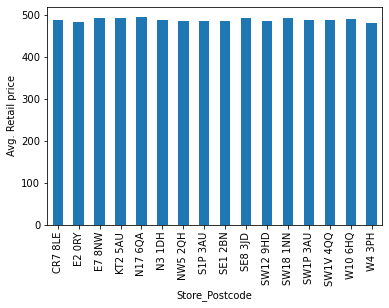

In [17]:
# barchart of store vs. mean retail price
# compute mean retail price per store
ax = laptop_df.groupby('Store_Postcode').mean().Retail_Price.plot(kind='bar')
ax.set_ylabel('Avg. Retail price')

From the above bar chart we can see that store postcode "N17 6QA" has highest average (494) and store postcode "W4 3PH" has lowest average 481 for the retail price.

__3.3.b.__ To better compare retail prices across stores, create side-by-side boxplots of retail price by store. Now compare the prices in the two stores from (a). Does there seem to be a difference between their price distributions?

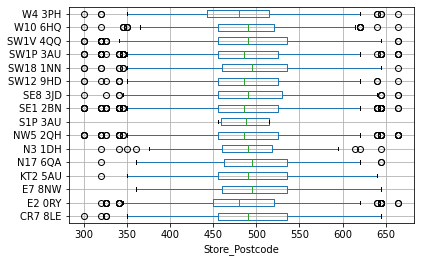

In [18]:
# The argument vert creates horizontal boxplots
ax = laptop_df.boxplot(column='Retail_Price', by='Store_Postcode', vert=False)
# Suppress the titles
plt.suptitle('')  
plt.title('')
plt.show()

We can see that the middle range of the prices is roughly similar across stores (just under 500 dollars, plus or minus 50).  The distributions for "N17 6QA" and "W4 3PH" are similar, except N17 6QA is shifted to the right (more expensive) by about 20 dollars compared to W4 3PH. 